# Lab 2: AI Search Algorithms (BFS vs DFS)
**Course:** COME6304 - Special Topics in SE

**Objective:** Implement and compare Breadth-First Search (BFS) and Depth-First Search (DFS) for graph traversal.

In [2]:
# CELL 1: Imports
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time

print("Libraries loaded!")

KeyboardInterrupt: 

In [12]:
# CELL 2: Create the Graph
def create_graph():
    G = nx.Graph()
    nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
    G.add_nodes_from(nodes)
    # Define connections
    edges = [
        ('A', 'B'), ('A', 'C'),
        ('B', 'D'), ('B', 'E'),
        ('C', 'F'), ('C', 'G'),
        ('D', 'H'),
        ('E', 'I'), ('E', 'J'),
        ('F', 'J')
    ]
    G.add_edges_from(edges)
    return G

G = create_graph()
print(f"Graph created with {G.number_of_nodes()} nodes.")

Graph created with 10 nodes.


In [13]:
# CELL 3: BFS Algorithm (Queue - FIFO)
def bfs(graph, start, goal):
    queue = deque([start])
    visited = {start}
    visited_order = [start]
    parent = {start: None}
    
    while queue:
        current = queue.popleft()
        if current == goal:
            path = []
            while current is not None:
                path.append(current)
                current = parent[current]
            return path[::-1], visited_order
        
        for neighbor in sorted(graph.neighbors(current)):
            if neighbor not in visited:
                visited.add(neighbor)
                visited_order.append(neighbor)
                parent[neighbor] = current
                queue.append(neighbor)
    return None, visited_order

In [14]:
# CELL 4: DFS Algorithm (Stack - LIFO)
def dfs(graph, start, goal):
    stack = [start]
    visited = {start}
    visited_order = []
    parent = {start: None}
    
    while stack:
        current = stack.pop()
        if current not in visited_order:
            visited_order.append(current)
            
        if current == goal:
            path = []
            while current is not None:
                path.append(current)
                current = parent[current]
            return path[::-1], visited_order
        
        visited.add(current)
        
        # Reverse sort for alphabetical stack order
        for neighbor in sorted(graph.neighbors(current), reverse=True):
            if neighbor not in visited:
                parent[neighbor] = current
                stack.append(neighbor)
    return None, visited_order

In [9]:
# CELL 5: Run & Compare
start, goal = 'A', 'J'

# BFS
t0 = time.time()
bfs_path, bfs_visited = bfs(G, start, goal)
bfs_time = (time.time() - t0) * 1000

# DFS
t0 = time.time()
dfs_path, dfs_visited = dfs(G, start, goal)
dfs_time = (time.time() - t0) * 1000

print(f"{'Algo':<10} {'Time(ms)':<10} {'Path Len':<10} {'Nodes Explored'}")
print("-"*50)
print(f"{'BFS':<10} {bfs_time:<10.4f} {len(bfs_path):<10} {len(bfs_visited)}")
print(f"{'DFS':<10} {dfs_time:<10.4f} {len(dfs_path):<10} {len(dfs_visited)}")
print("-"*50)
print(f"BFS Path: {bfs_path}")
print(f"DFS Path: {dfs_path}")

Algo       Time(ms)   Path Len   Nodes Explored
--------------------------------------------------
BFS        0.0000     4          10
DFS        0.0000     4          7
--------------------------------------------------
BFS Path: ['A', 'B', 'E', 'J']
DFS Path: ['A', 'B', 'E', 'J']


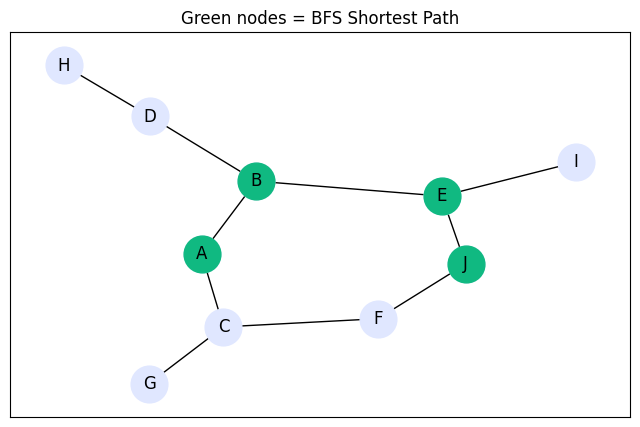

In [10]:
# CELL 6: Visualize BFS Path
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 5))
nx.draw_networkx_nodes(G, pos, node_color='#e0e7ff', node_size=700)
nx.draw_networkx_nodes(G, pos, nodelist=bfs_path, node_color='#10b981', node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title("Green nodes = BFS Shortest Path")
plt.show()